# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | praia da vitoria
Processing Record 5 of Set 1 | palmer
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | tezu
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tabas
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | mejit
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | arteche
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | haiku-pauwela
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1 | ola
Processing Record 22 of Set 1 | margaret river
Processing Recor

Processing Record 43 of Set 4 | ebon
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | yeppoon
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | gadzhiyevo
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | dudley park
Processing Record 0 of Set 5 | glace bay
Processing Record 1 of Set 5 | illizi
Processing Record 2 of Set 5 | nema
Processing Record 3 of Set 5 | castillos
Processing Record 4 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 5 | paradip garh
Processing Record 6 of Set 5 | nuuk
Processing Record 7 of Set 5 | coahuayana de hidalgo
Processing Record 8 of Set 5 | anan
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | pundong
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | baishishan
Processing Record 13 of Set 5 | astrakhan
Processing Record 14 of Set 5 | mutoko
Processing Record 15 of Set 5 | soultz-haut-rhin
Processing Record 

Processing Record 37 of Set 8 | hakui
Processing Record 38 of Set 8 | siwa oasis
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | sorong
Processing Record 41 of Set 8 | kipushi
Processing Record 42 of Set 8 | gandajika
Processing Record 43 of Set 8 | broome
Processing Record 44 of Set 8 | loikaw
Processing Record 45 of Set 8 | nogliki
Processing Record 46 of Set 8 | jatani
Processing Record 47 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 48 of Set 8 | businga
Processing Record 49 of Set 8 | ts'khinvali
Processing Record 0 of Set 9 | puerto baquerizo moreno
Processing Record 1 of Set 9 | tha khanon
Processing Record 2 of Set 9 | borogontsy
Processing Record 3 of Set 9 | laguna
Processing Record 4 of Set 9 | luena
Processing Record 5 of Set 9 | athens
Processing Record 6 of Set 9 | beinamar
Processing Record 7 of Set 9 | vila franca do campo
Processing Record 8 of Set 9 | kiamba
Processing Record 9 of Set 9 | greymouth
Proces

Processing Record 26 of Set 12 | changji
Processing Record 27 of Set 12 | alofi
Processing Record 28 of Set 12 | el sauzal de rodriguez
Processing Record 29 of Set 12 | aracuai
Processing Record 30 of Set 12 | prince george
Processing Record 31 of Set 12 | sibu
Processing Record 32 of Set 12 | jayrud
Processing Record 33 of Set 12 | fray luis a. beltran
Processing Record 34 of Set 12 | codrington
Processing Record 35 of Set 12 | al mawsil al jadidah
Processing Record 36 of Set 12 | boksitogorsk
Processing Record 37 of Set 12 | maralal
Processing Record 38 of Set 12 | cantaura
Processing Record 39 of Set 12 | magdagachi
Processing Record 40 of Set 12 | zapolyarnyy
Processing Record 41 of Set 12 | grenada
Processing Record 42 of Set 12 | setti fatma
City not found. Skipping...
Processing Record 43 of Set 12 | jiayuguan
Processing Record 44 of Set 12 | viana do castelo
Processing Record 45 of Set 12 | noosa heads
Processing Record 46 of Set 12 | hauterive
Processing Record 47 of Set 12 | 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,84,100,3.13,NZ,1700338616
1,remire-montjoly,4.9167,-52.2667,29.02,79,75,5.14,GF,1700338618
2,cidreira,-30.1811,-50.2056,21.07,83,99,5.96,BR,1700338619
3,praia da vitoria,38.7333,-27.0667,19.31,82,40,7.32,PT,1700338620
4,palmer,42.1584,-72.3287,8.90,53,20,8.75,US,1700338369


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,84,100,3.13,NZ,1700338616
1,remire-montjoly,4.9167,-52.2667,29.02,79,75,5.14,GF,1700338618
2,cidreira,-30.1811,-50.2056,21.07,83,99,5.96,BR,1700338619
3,praia da vitoria,38.7333,-27.0667,19.31,82,40,7.32,PT,1700338620
4,palmer,42.1584,-72.3287,8.90,53,20,8.75,US,1700338369


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

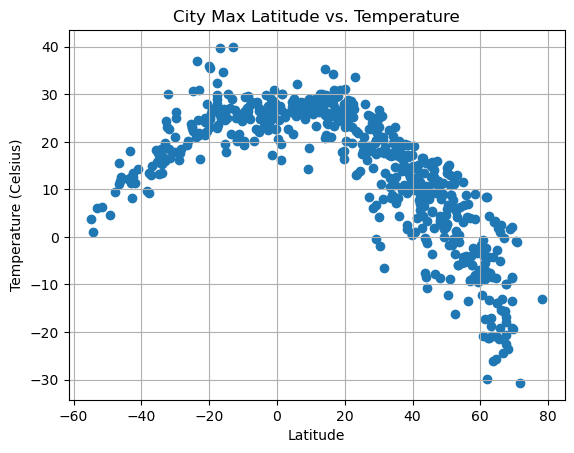

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df[ "Max Temp"], marker="o")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

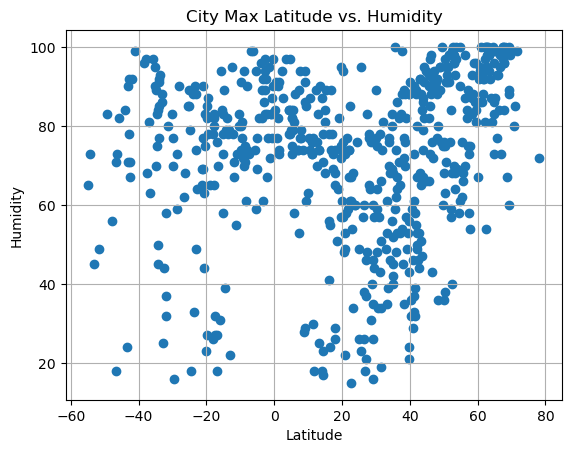

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")


# Incorporate the other graph properties

plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

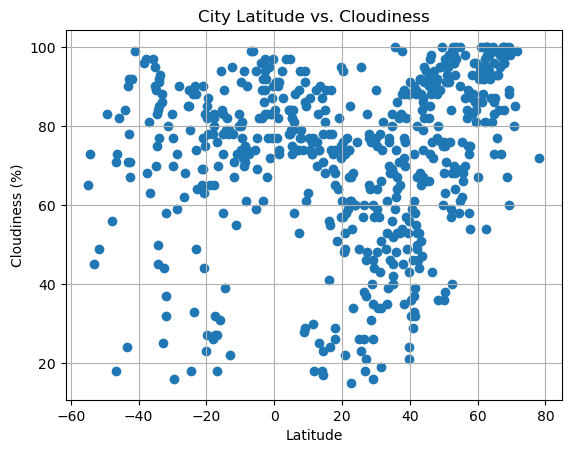

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

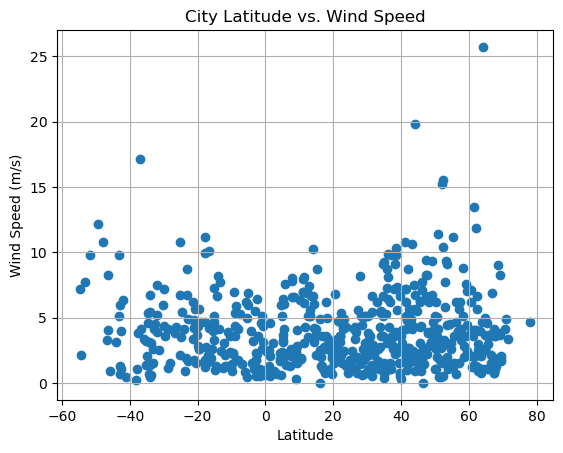

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,remire-montjoly,4.9167,-52.2667,29.02,79,75,5.14,GF,1700338618
3,praia da vitoria,38.7333,-27.0667,19.31,82,40,7.32,PT,1700338620
4,palmer,42.1584,-72.3287,8.90,53,20,8.75,US,1700338369
5,iqaluit,63.7506,-68.5145,-4.15,92,100,2.06,CA,1700338368
7,tezu,27.9167,96.1667,18.17,78,8,1.45,IN,1700338626


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df= city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,84,100,3.13,NZ,1700338616
2,cidreira,-30.1811,-50.2056,21.07,83,99,5.96,BR,1700338619
6,bredasdorp,-34.5322,20.0403,17.04,83,100,1.45,ZA,1700338624
10,port mathurin,-19.6833,63.4167,25.14,82,100,5.63,MU,1700338629
12,edinburgh of the seven seas,-37.0676,-12.3116,13.09,81,82,17.13,SH,1700338632


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7503561957919067


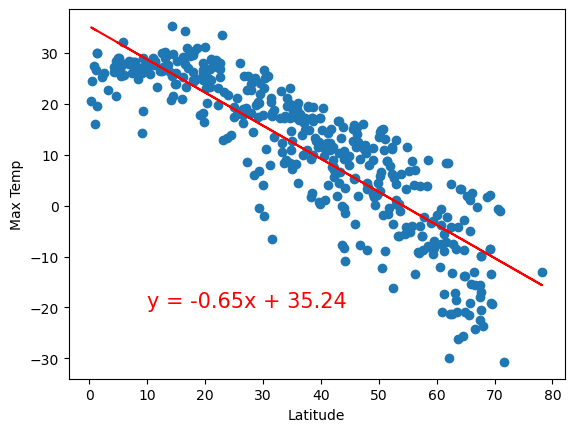

In [27]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,-20))

The r-value is: 0.5325784188220233


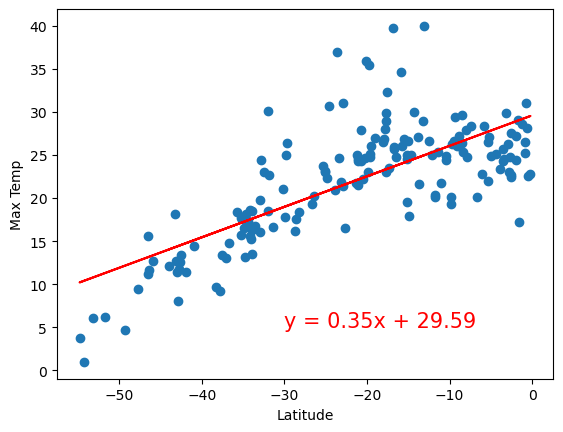

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10024782246256807


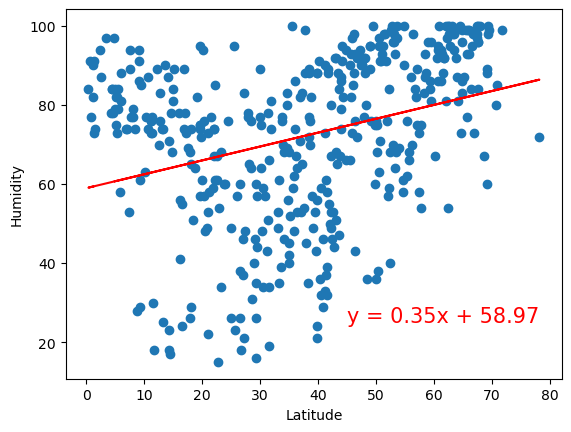

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(45,25))

The r-value is: 0.028886659094829254


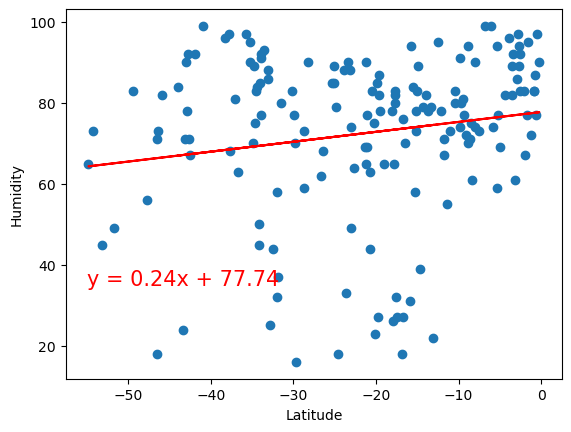

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-55,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.045379974713372025


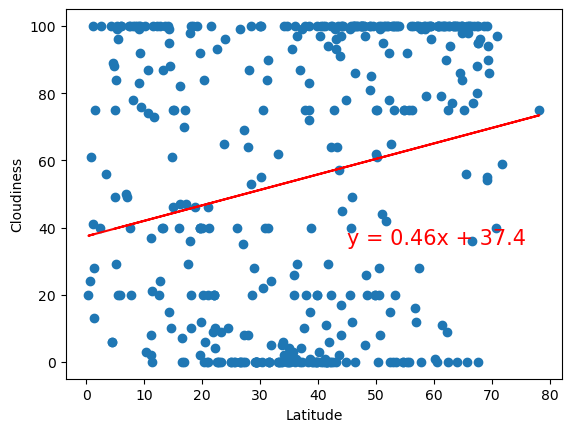

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,35))

The r-value is: 0.0077551013318237945


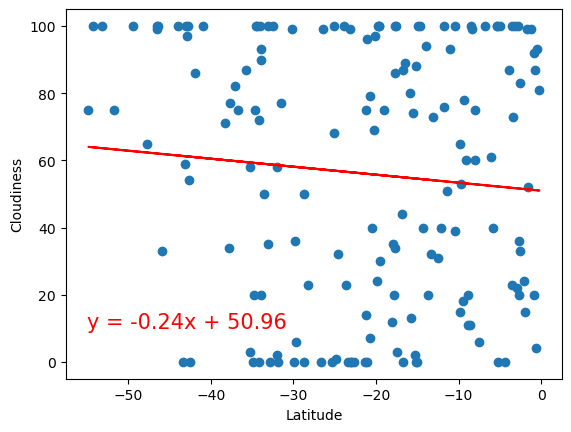

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008687064188416312


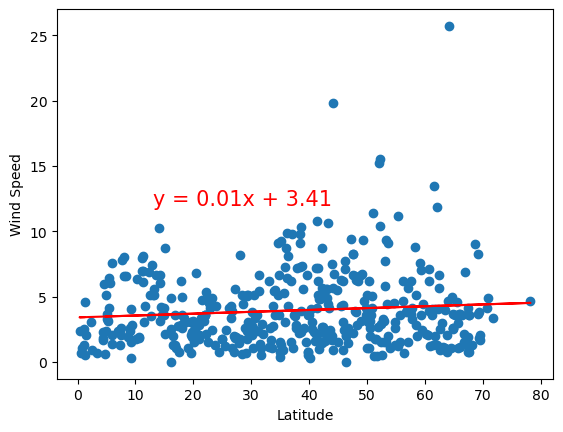

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(13,12))

The r-value is: 0.05098401410185557


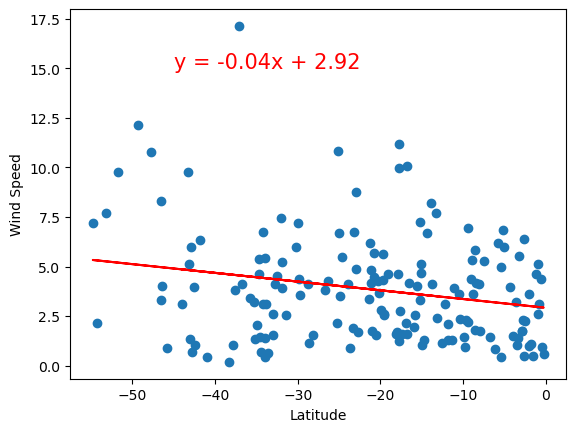

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-45,15))

**Discussion about the linear relationship:**The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.